In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [17]:
% matplotlib inline

In [6]:
data_train = pd.read_csv('titanic/train.csv')
data_test = pd.read_csv('titanic/test.csv')

In [8]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [27]:
sexy_data = pd.pivot_table(data_train, index="Sex", values='Survived')

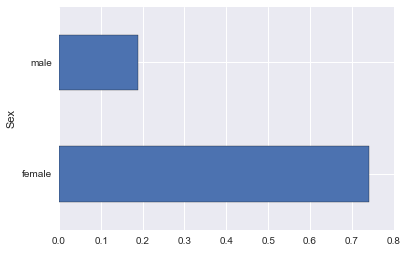

In [28]:
sexy_data.plot(kind='barh')

##Pivot Function:

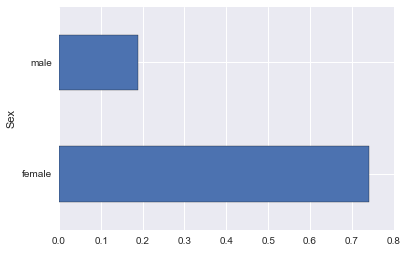

In [36]:
def pivot_palace(data, index, **kwargs):
    return pd.pivot_table(data, index=index, **kwargs).plot(kind='barh')

pivot_palace(data_train,"Sex", values='Survived')

### The standard for writing Data:

In [46]:
first_test = pd.read_csv('titanic/test.csv')
first_test['Survived'] = 0
first_test.loc[first_test["Sex"] == 'female', 'Survived'] = 1
first_test = first_test[['PassengerId', 'Survived']]
first_test.to_csv('titanic/sex_frame.csv', index=False)

In [89]:
first_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


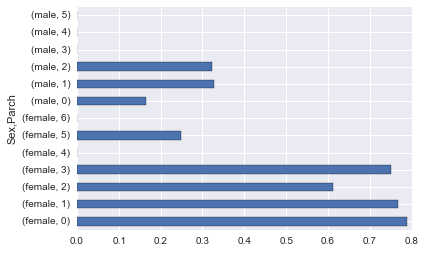

In [62]:
first = pd.pivot_table(data_train, index=["Sex", 'Parch'], values='Survived')
first.plot(kind='barh')

In [68]:
def age_range(age):
    if str(age) == "nan":
        return "unknown"
    elif age >= 13: 
        return "adult" 
    else:
        return "child"

In [69]:
data_train['AgeRange'] = data_train['Age'].map(age_range)

Survived
Sex    AgeRange Pclass Embarked          
female adult    1      C         0.973684
                       Q         1.000000
                       S         0.976744
                2      C         1.000000
                       Q         1.000000
                       S         0.898305
                3      C         0.600000
                       Q         0.500000
                       S         0.423729
       child    1      S         0.000000
                2      C         1.000000
                       S         1.000000
                3      C         0.833333
                       S         0.352941
       unknown  1      C         1.000000
                       S         1.000000
                2      Q         1.000000
                       S         1.000000
                3      C         0.571429
                       Q         0.826087
                       S         0.166667
male   adult    1      C         0.444444
                       Q         0.000000
                       S         0.344262
                2      C         0.000000
                       Q         0.000000
                       S         0.073171
                3      C         0.227273
                       Q         0.100000
                       S         0.117347
       child    1      S         1.000000
                2      C         1.000000
                       S         1.000000
                3      C         0.666667
                       Q         0.000000
                       S         0.388889
       unknown  1      C         0.166667
                       S         0.266667
                2      C         0.500000
                       S         0.142857
                3      C         0.166667
                       Q         0.080000
                       S         0.078431

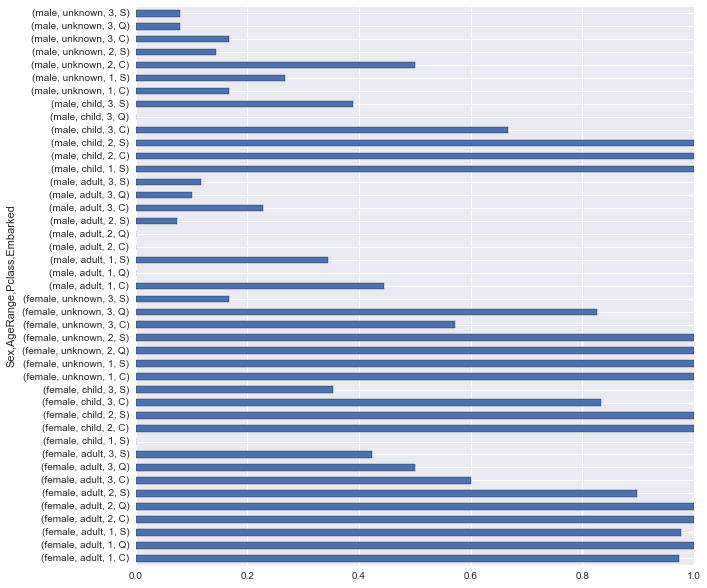

In [138]:
age_parch = pd.pivot_table(data_train, index=["Sex", 'AgeRange', 'Pclass', 'Embarked'], values='Survived')
age_parch.plot(kind='barh', figsize = (10,10))
age_parch.to_frame()

In [142]:
second_test = pd.read_csv('titanic/test.csv')
second_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [140]:
second_test['AgeRange'] = second_test['Age'].map(age_range)
second_test['Survived'] = 0
second_test.loc[second_test['Sex'] == 'female', 'Survived'] = 1
second_test.loc[(second_test['Sex'] == 'female') & (second_test['AgeRange'] == 'unknown') & (second_test['Parch'] == 2), 'Survived'] = 0
second_test.loc[(second_test['Sex'] == 'female') & (second_test['AgeRange'] == 'adult') & (second_test['Parch'] == 5), 'Survived'] = 0
second_test.loc[(second_test['Sex'] == 'female') & (second_test['AgeRange'] == 'child') & (second_test['SibSp'] == 2), 'Survived'] = 0
second_test.loc[(second_test['Sex'] == 'male') & (second_test['AgeRange'] == 'child') & (second_test['SibSp'] == 2), 'Survived'] = 1
second_test.loc[(second_test['Sex'] == 'male') & (second_test['AgeRange'] == 'child') & (second_test['SibSp'] == 1), 'Survived'] = 1
second_test.loc[(second_test['Sex'] == 'male') & (second_test['AgeRange'] == 'child') & (second_test['SibSp'] == 0), 'Survived'] = 1
second_test.loc[(second_test['Sex'] == 'male') & (second_test['AgeRange'] == 'child') & (second_test['Pclass'] == 1), 'Survived'] = 1
second_test.loc[(second_test['Sex'] == 'male') & (second_test['AgeRange'] == 'child') & (second_test['Pclass'] == 2), 'Survived'] = 1
second_test.loc[(second_test['Sex'] == 'female') & (second_test['AgeRange'] == 'adult') & (second_test['Pclass'] == 3) & (second_test['Embarked'] == 'S'), 'Survived'] = 0
second_test.loc[(second_test['Sex'] == 'female') & (second_test['AgeRange'] == 'unknown') & (second_test['Pclass'] == 3) & (second_test['Embarked'] == 'S'), 'Survived'] = 0

second_test = second_test[['PassengerId', 'Survived']]

In [135]:
second_test.loc[(second_test['Sex'] == 'male') & (second_test['AgeRange'] == 'child') & (second_test['Pclass'] == 1), 'Survived']

196    1
Name: Survived, dtype: int64

In [141]:
second_test.to_csv('titanic/parch_sibsp_pclass_embark.csv', index=False)

In [113]:
second_test.head(100)

,PassengerId,Survived,Pclass
0,892,0,3
1,893,1,3
2,894,0,2
3,895,0,3
4,896,1,3
5,897,0,3
6,898,1,3
7,899,0,2
8,900,1,3
9,901,0,3
